# Supervised Classification of Titanic Survivors

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#Extraction---Get-Titanic-data" data-toc-modified-id="Extraction---Get-Titanic-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extraction - Get Titanic data</a></span></li><li><span><a href="#Explore/Transform-Titanic-data" data-toc-modified-id="Explore/Transform-Titanic-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore/Transform Titanic data</a></span><ul class="toc-item"><li><span><a href="#initial-exploration" data-toc-modified-id="initial-exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>initial exploration</a></span></li><li><span><a href="#identify-missing-data" data-toc-modified-id="identify-missing-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>identify missing data</a></span></li><li><span><a href="#age" data-toc-modified-id="age-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>age</a></span></li><li><span><a href="#deck" data-toc-modified-id="deck-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>deck</a></span></li><li><span><a href="#fares" data-toc-modified-id="fares-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>fares</a></span></li><li><span><a href="#duplicate-columns" data-toc-modified-id="duplicate-columns-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>duplicate columns</a></span></li><li><span><a href="#remaining-missing-data-treatment" data-toc-modified-id="remaining-missing-data-treatment-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>remaining missing data treatment</a></span></li><li><span><a href="#convert-categorical-data-to-dummy-variables" data-toc-modified-id="convert-categorical-data-to-dummy-variables-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>convert categorical data to dummy variables</a></span></li><li><span><a href="#Correlation-matrix-heatmap" data-toc-modified-id="Correlation-matrix-heatmap-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Correlation matrix heatmap</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-classifier" data-toc-modified-id="Decision-tree-classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decision tree classifier</a></span></li><li><span><a href="#Random-forest-classifier" data-toc-modified-id="Random-forest-classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random forest classifier</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Gradient-boosting-classifier" data-toc-modified-id="Gradient-boosting-classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Gradient boosting classifier</a></span></li><li><span><a href="#Naive-Bayes-classifier" data-toc-modified-id="Naive-Bayes-classifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Naive Bayes classifier</a></span></li><li><span><a href="#K-Nearest-Neighbor-classifier" data-toc-modified-id="K-Nearest-Neighbor-classifier-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>K-Nearest-Neighbor classifier</a></span></li><li><span><a href="#SVM-classifier" data-toc-modified-id="SVM-classifier-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>SVM classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## imports

In [1]:
# analytical tools
import pandas as pd
import seaborn as sns

## Extraction - Get Titanic data

In [2]:
data = sns.load_dataset('titanic')
data.head(5)
# Note:
#    pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#    sibsp - Number of Siblings/Spouses Aboard
#    parch - Number of Parents/Children Aboard

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Explore/Transform Titanic data

### initial exploration

In [3]:
# quick overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# quick overview of data
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### identify missing data

<AxesSubplot:>

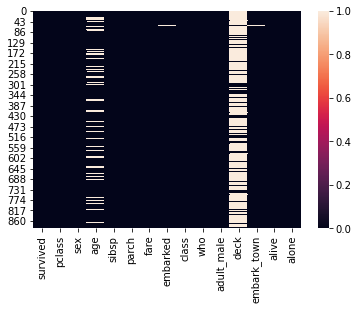

In [5]:
# heat map of missing data
sns.heatmap(data.isna())

### age

<AxesSubplot:xlabel='age', ylabel='Count'>

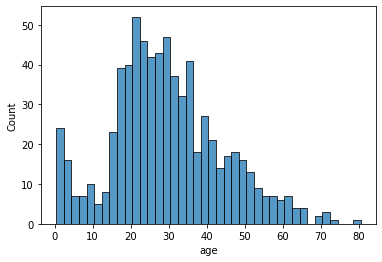

In [6]:
# There are some missing ages, First a quick
# look at the data, to see whether we can
# 1 - impute missing ages (eg. by regression)
# 2 - remove missing ages
# 3 - categorise missing ages as missing
sns.histplot(data['age'], binwidth=2)

In [7]:
# Let's add a missing category, 
# and treat the rest as follows:
# - children 0-14 years
# - working age 15-49 years
# - older age 50+ years (think life expectency in 1912)
data['age_cat'] = pd.Series('missing', index=data.index).where(
    data['age'].isna(), 
    other=pd.cut(data['age'].dropna(), 
                 bins=[0,14,49,1000], 
                 labels=['child', 'working', 'older'])
)
# and show results
data['age_cat'].value_counts()

working    563
missing    177
child       77
older       74
Name: age_cat, dtype: int64

### deck

In [8]:
# let's look at deck, noting it has many missing values (above)
data['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [9]:
# can we use fare to impute deck? probably not!
data.groupby('deck')['fare'].agg(['min', 'mean', 'median', 'max', 'count'])

,min,mean,median,max,count
deck,,,,,
A,0.0000,39.623887,35.50000,81.8583,15
B,0.0000,113.505764,80.00000,512.3292,47
C,26.5500,100.151341,83.47500,263.0000,59
D,12.8750,57.244576,53.10000,113.2750,33
E,8.0500,46.026694,45.18125,134.5000,32
F,7.6500,18.696792,13.00000,39.0000,13
G,10.4625,13.581250,13.58125,16.7000,4


In [10]:
# let's code the missing deck values as 'missing'
data['deck'] = pd.Series('missing', index=data.index).where(
        data['deck'].isna(), other=data['deck'])
data['deck'].value_counts()

missing    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: deck, dtype: int64

### fares

In [11]:
# Missing fares information?
fare = data["fare"]
print('Number of no fare passengers: '
      f'{fare[fare == 0].count()}') 
print('Age of no-fare passengers: ', 
      data[data['fare'] == 0]['age'].values)
print('Passenger class of no-fare passengers: ', 
      data[data['fare'] == 0]['pclass'].values)
print('Alone-ness of no-fare passengers: ', 
      data[data['fare'] == 0]['alone'].values)

# the above suggests zero fares is missing data
# let's just ignore

Number of no fare passengers: 15
Age of no-fare passengers:  [36. 40. 25. nan 19. nan nan nan 49. nan nan nan 39. nan 38.]
Passenger class of no-fare passengers:  [3 1 3 2 3 2 2 2 3 1 2 2 1 1 1]
Alone-ness of no-fare passengers:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


<AxesSubplot:xlabel='fare', ylabel='Count'>

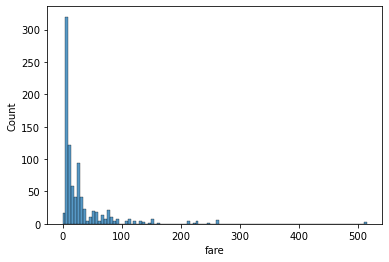

In [12]:
sns.histplot(data['fare'], binwidth=5)

### duplicate columns

In [13]:
# A number of columns have the same information in different
# formats - so we will drop these duplicates
potential_duplicates = ['who', 'adult_male', 'alive', 
                        'embarked', 'class', 'age',
                        'alone',]
dropable = []
for d in potential_duplicates:
    if d in data.columns:
        dropable.append(d)
data = data.drop(columns=dropable)

### remaining missing data treatment

In [14]:
# handle remaining missing data by exclusion 
data = data.dropna(axis='index', how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   deck         889 non-null    object 
 7   embark_town  889 non-null    object 
 8   age_cat      889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [15]:
# let's see what we have now
data.head()

,survived,pclass,sex,sibsp,parch,fare,deck,embark_town,age_cat
0,0,3,male,1,0,7.2500,missing,Southampton,working
1,1,1,female,1,0,71.2833,C,Cherbourg,working
2,1,3,female,0,0,7.9250,missing,Southampton,working
3,1,1,female,1,0,53.1000,C,Southampton,working
4,0,3,male,0,0,8.0500,missing,Southampton,working


### convert categorical data to dummy variables

In [16]:
# let's look at the remaining categorical variables
print(data['embark_town'].value_counts(), '\n')
print(data['sex'].value_counts(), '\n')

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64 

male      577
female    312
Name: sex, dtype: int64 



In [17]:
# convert all categories to numeric dummy value columns
# - first, create some dummy value columns
embarked_dummy = pd.get_dummies(data['embark_town'])
embarked_dummy.columns = 'embarked_' + embarked_dummy.columns
sex_dummy = pd.get_dummies(data['sex'])
sex_dummy.columns = 'sex_' + sex_dummy.columns
age_dummy = pd.get_dummies(data['age_cat'])
age_dummy.columns = 'age_' + age_dummy.columns
deck_dummy = pd.get_dummies(data['deck'])
deck_dummy.columns = 'deck_' + deck_dummy.columns

# - next, attach these to the dataframe
data_dummy = pd.concat([data, embarked_dummy, sex_dummy, 
                        age_dummy, deck_dummy], 
                       axis='columns')

# - finally, drop original category columns
data_dummy = data_dummy.drop(columns=['embark_town', 'sex', 
                                      'age_cat', 'deck'])
data_dummy.head(3)

,survived,pclass,sibsp,parch,fare,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,sex_female,sex_male,...,age_older,age_working,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_missing
0,0,3,1,0,7.2500,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,71.2833,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


### Correlation matrix heatmap

<AxesSubplot:>

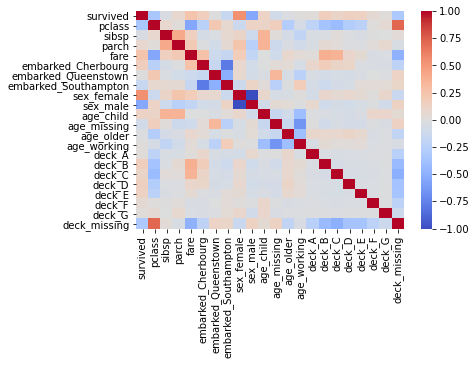

In [18]:
# correlation heatmap
sns.heatmap(data_dummy.corr(), 
            cmap='coolwarm',
            xticklabels=True, # want them all printed
            yticklabels=True)

## Classification

In [19]:
# separate the data into x and y values
x = data_dummy.drop('survived', axis='columns').values
y = data_dummy['survived'].values

In [20]:
# split the data into 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = (
    train_test_split(x, y, test_size=0.3, random_state=0)
)

In [21]:
# tabulate the results in a dictionary
results = {}

### Decision tree classifier

In [22]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=5)       # build
dtc.fit(x_train, y_train)                            # fit
results['Decision Tree'] = dtc.score(x_test, y_test) # predict
results['Decision Tree']

0.7640449438202247

### Random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)          # build
rfc.fit(x_train, y_train)                               # fit
results['Random Forest'] = rfc.score(x_test, y_test)    # predict
results['Random Forest']

0.7940074906367042

### Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=1000)                 # build
lrc.fit(x_train, y_train)                               # fit
results['Logistic Regr'] = lrc.score(x_test, y_test)
results['Logistic Regr'] 

0.7827715355805244

### Gradient boosting classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(x_train, y_train)                               # fit
results['Gradient Boosting'] = gbc.score(x_test, y_test)
results['Gradient Boosting']

0.8089887640449438

### Naive Bayes classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)                               # fit
results['Naive Bayes'] = nbc.score(x_test, y_test)  
results['Naive Bayes']

0.704119850187266

### K-Nearest-Neighbor classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)                               # fit
results['KNN'] = knn.score(x_test, y_test)  
results['KNN']

0.7153558052434457

### SVM classifier

In [28]:
from sklearn.svm import SVC
svc = SVC(probability=True, kernel='linear')
svc.fit(x_train, y_train)  
results['Support-vector machine'] = svc.score(x_test, y_test) 
results['Support-vector machine']

0.7715355805243446

## Conclusion

In [29]:
pd.Series(results).sort_values(ascending=False)

Gradient Boosting         0.808989
Random Forest             0.794007
Logistic Regr             0.782772
Support-vector machine    0.771536
Decision Tree             0.764045
KNN                       0.715356
Naive Bayes               0.704120
dtype: float64